# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
data = pd.read_csv('../Data/Hotel_Booking.csv')

# Exploratory Data Analysis and Data Cleaning

In [3]:
print(data.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [4]:
print(data.tail())

             hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                        

In [5]:
print(data.shape)

(119390, 32)


In [6]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [10]:
print(data.describe(include='object'))

             hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status  
count        119390        119390             119390  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104641         89613              75166  


In [11]:
for col in data.describe(include = 'object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)
    

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [12]:
print(data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
data.drop(['company','agent'], axis=1, inplace = True)
data.dropna(inplace =True)

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118870 entries, 0 to 119361
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118870 non-null  object        
 1   is_canceled                     118870 non-null  int64         
 2   lead_time                       118870 non-null  int64         
 3   arrival_date_year               118870 non-null  int64         
 4   arrival_date_month              118870 non-null  object        
 5   arrival_date_week_number        118870 non-null  int64         
 6   arrival_date_day_of_month       118870 non-null  int64         
 7   stays_in_weekend_nights         118870 non-null  int64         
 8   stays_in_week_nights            118870 non-null  int64         
 9   adults                          118870 non-null  int64         
 10  children                        118870 non-null  float64

In [15]:
print(data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
print(data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  118870.000000  118870.000000      118870.000000   
mean        0.371439     104.298789        2016.157458   
std         0.483192     106.907652           0.707424   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118870.000000              118870.000000   
mean                  27.164718                  15.797611   
std                   13.591044                   8.778745   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [17]:
print(data[data['adr']<5000])

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119357    City Hotel            0         47               2017   
119358    City Hotel            0        135               2017   
119359    City Hotel            0         63               2017   
119360    City Hotel            0        195               2017   
119361    City Hotel            0        100               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

# Data Analysis and Visualizations

In [18]:
cancelled_perc= data['is_canceled'].value_counts(normalize= True)
print(cancelled_perc)

0    0.628561
1    0.371439
Name: is_canceled, dtype: float64


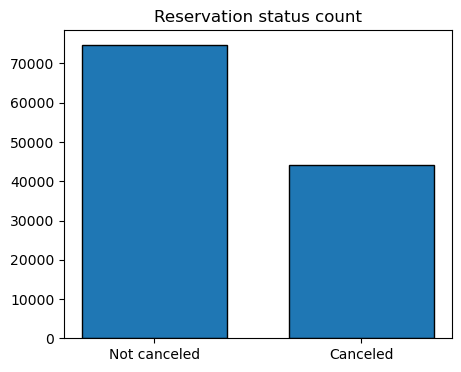

In [19]:

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'],data['is_canceled'].value_counts(), edgecolor='k',width=0.7)
plt.show()

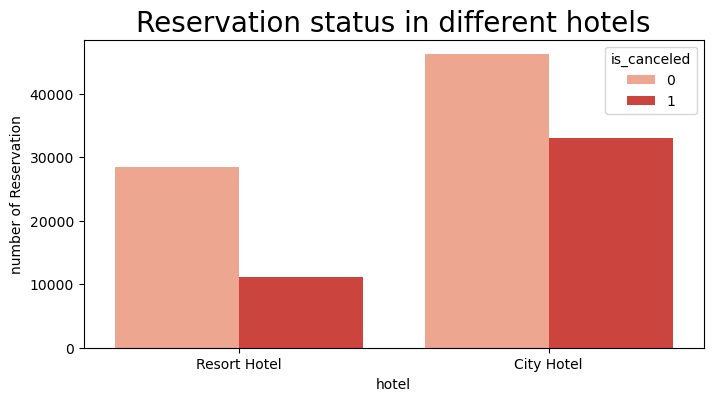

In [20]:
plt.figure(figsize =(8,4))
ax1=sns.countplot(x='hotel', hue= 'is_canceled',data=data, palette ='Reds')
legend_labels=ax1.get_legend_handles_labels()
plt.title('Reservation status in different hotels', size=20)
plt.xlabel('hotel')
plt.ylabel('number of Reservation')
plt.show()


In [21]:
resort_hotel = data[data['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [22]:
city_hotel = data[data['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)

0    0.582764
1    0.417236
Name: is_canceled, dtype: float64

In [23]:
resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel= city_hotel.groupby('reservation_status_date')[['adr']].mean()

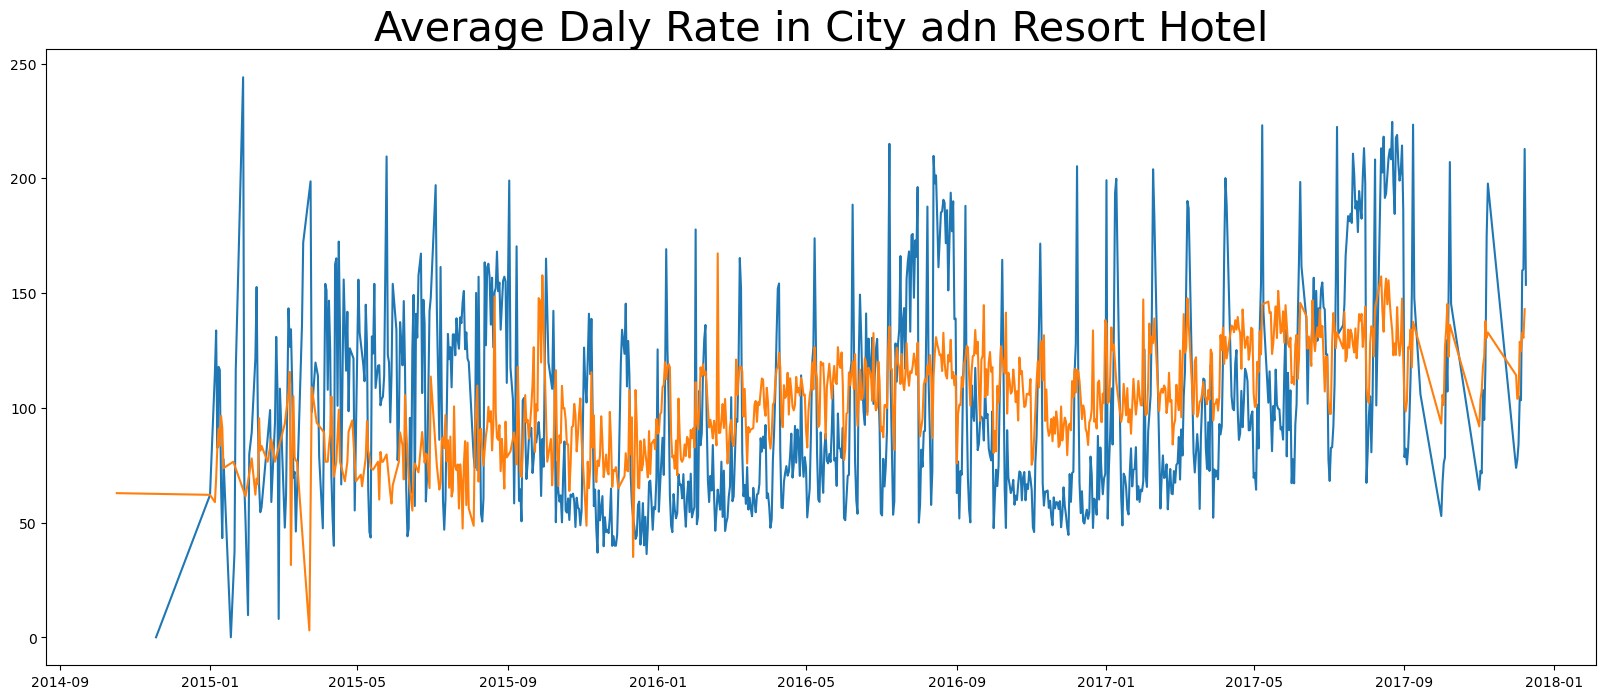

In [24]:
plt.figure(figsize =(20,8))
plt.title('Average Daly Rate in City adn Resort Hotel', fontsize =30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label= 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.show()

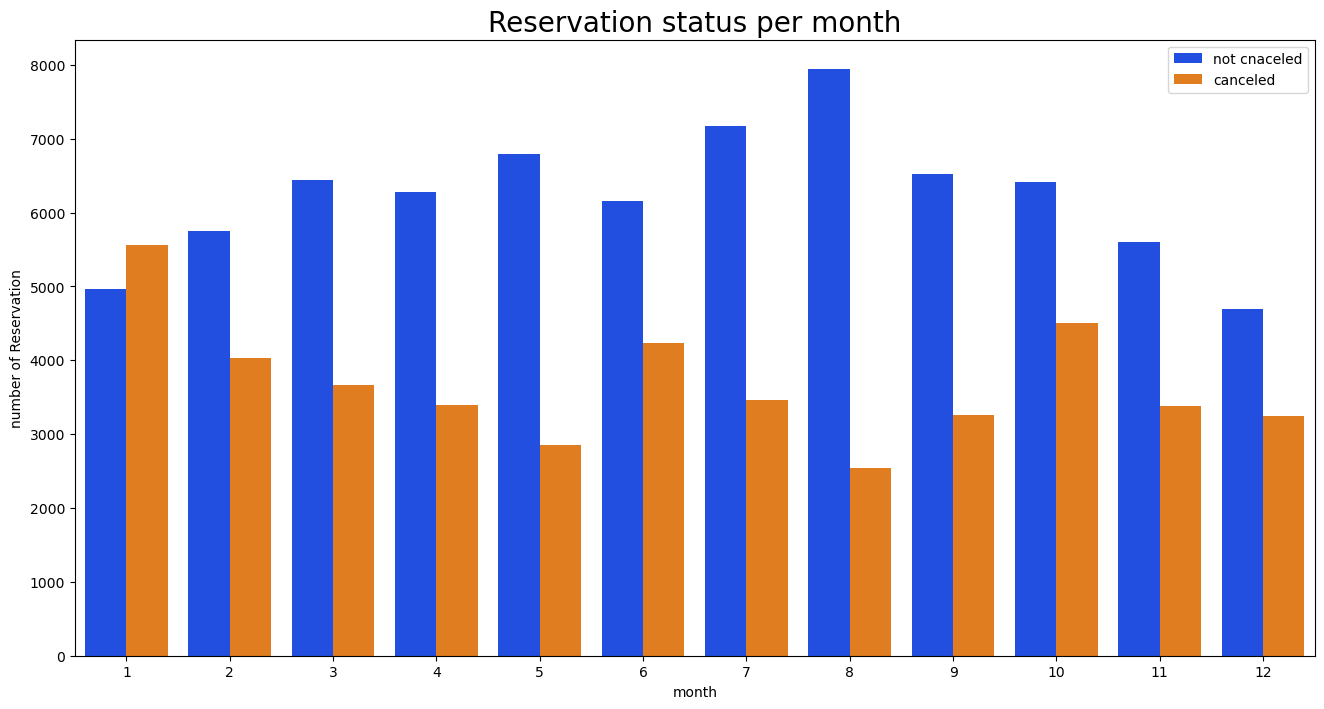

In [33]:
df=data
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month', hue = 'is_canceled', data=df, palette = 'bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size=20)
plt.xlabel('month')
plt.ylabel('number of Reservation')
plt.legend(['not cnaceled', 'canceled'])
plt.show()


In [29]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119357,City Hotel,0,47,2017,August,35,31,1,3,1,...,D,0,No Deposit,0,Transient,91.02,0,0,Check-Out,2017-04-09
119358,City Hotel,0,135,2017,August,35,30,1,4,2,...,D,0,No Deposit,0,Transient,143.10,0,1,Check-Out,2017-04-09
119359,City Hotel,0,63,2017,August,35,31,1,3,2,...,A,1,No Deposit,0,Transient,133.50,0,1,Check-Out,2017-04-09
119360,City Hotel,0,195,2017,August,35,29,1,5,2,...,A,0,No Deposit,0,Transient,117.00,0,1,Check-Out,2017-04-09


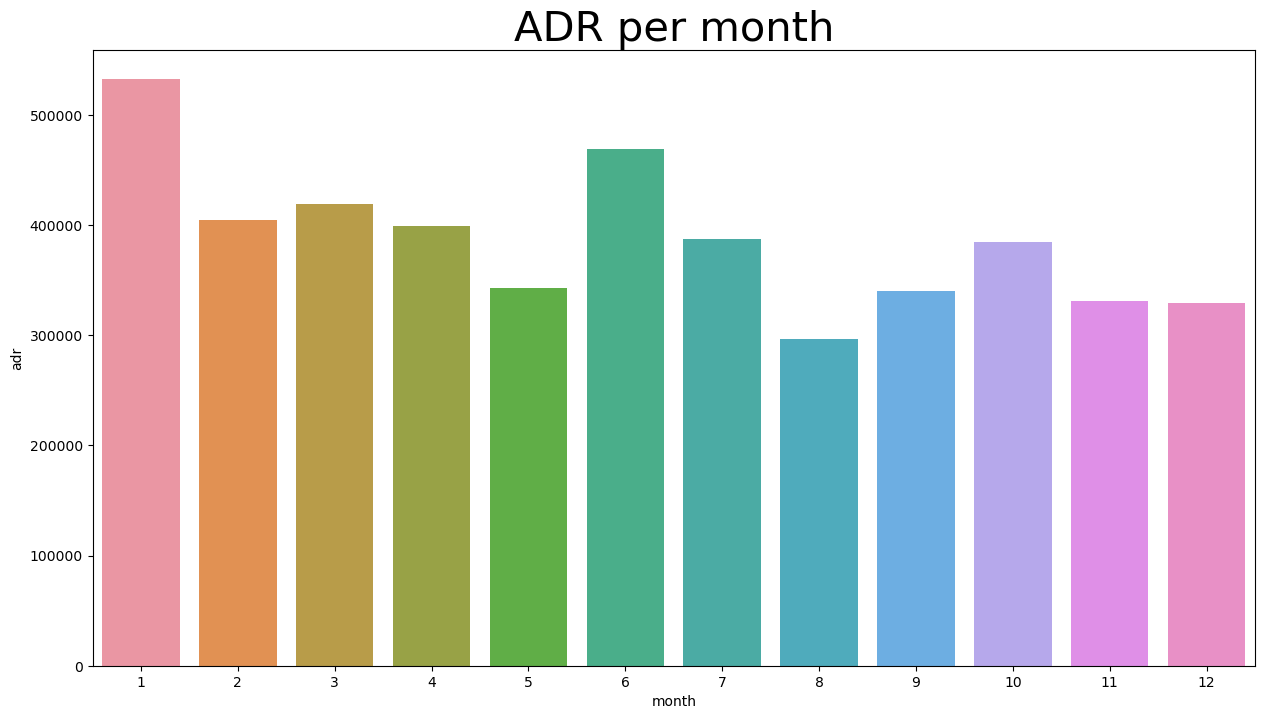

In [39]:

plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize =30)
sns.barplot('month','adr', data= df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

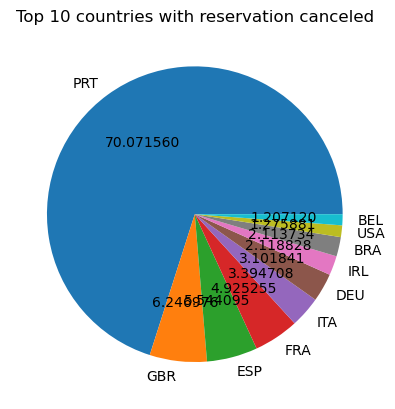

In [43]:
cancelled_data=df[df['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts()[:10]
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%2f', labels = top_10_country.index)
plt.show()

In [45]:
df['market_segment'].value_counts()

Online TA        56386
Offline TA/TO    24152
Groups           19806
Direct           12444
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [46]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474350
Offline TA/TO    0.203180
Groups           0.166619
Direct           0.104686
Corporate        0.042997
Complementary    0.006175
Aviation         0.001994
Name: market_segment, dtype: float64

In [47]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469685
Groups           0.273979
Offline TA/TO    0.187484
Direct           0.043485
Corporate        0.022150
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

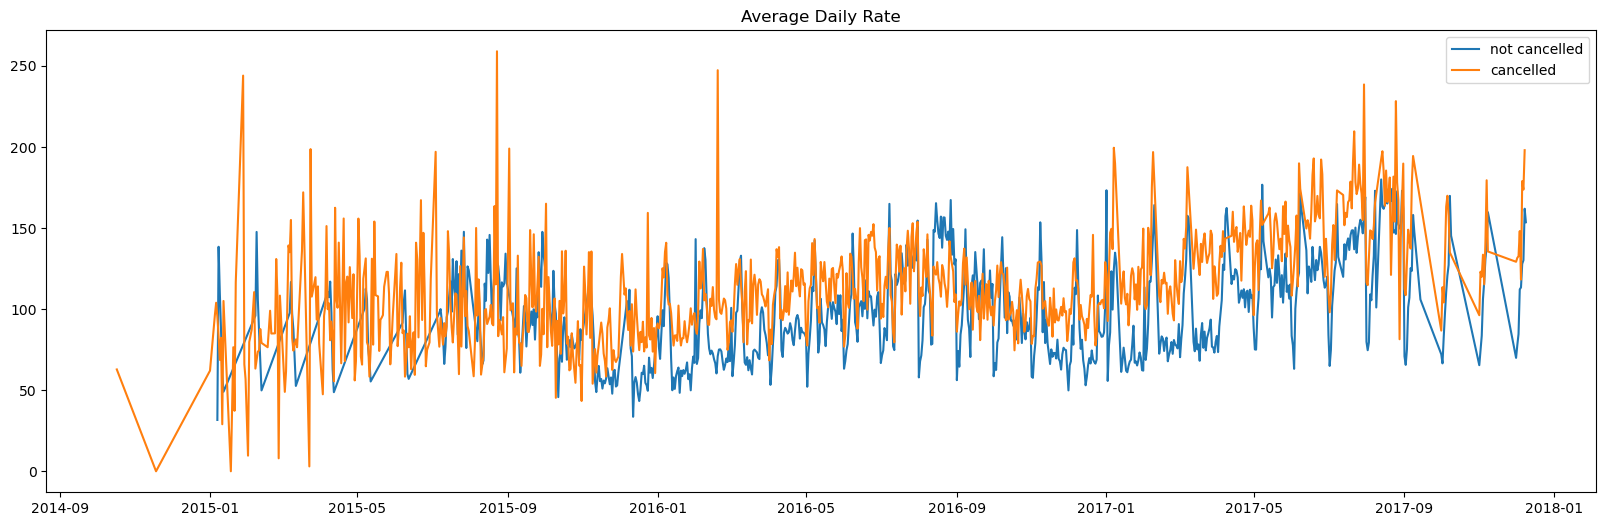

In [54]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)


not_cancelled_data=df[df['is_canceled']==0] 
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace= True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.legend()